[1] Wczytaj dane do DataFrame przy użyciu biblioteki Pandas. Wykonaj operacje, które pozwolą Ci wyświetlić podstawowe informacje o DataFrame, takie jak pierwsze i ostatnie wiersze, nazwy kolumn oraz statystyki opisowe. 

Dane: [[1, 2 ,3 ], [4, 5, 6], [7, 8, 9]], Kolumny: ['A', 'B', 'C']

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], 
                  columns=["A", "B", "C"])

In [8]:
df.head()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In [3]:
df.tail()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In [12]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [4]:
df.describe()

,A,B,C
count,4.000000,4.000000,4.000000
mean,5.500000,6.500000,7.500000
std,3.872983,3.872983,3.872983
min,1.000000,2.000000,3.000000
25%,3.250000,4.250000,5.250000
50%,5.500000,6.500000,7.500000
75%,7.750000,8.750000,9.750000
max,10.000000,11.000000,12.000000


[2] Wykonaj analizę unikalnych wartości w kolumnach oraz sprawdź kształt i rozmiar DataFrame. Zrób użycie funkcji nunique(), unique() na kolumnie 'A', shape oraz size, aby uzyskać więcej informacji na temat danych. 

In [5]:
unique_count = df['A'].nunique()
unique_values = df['A'].unique()

print(f"Liczba unikalnych wartości w kolumnie 'A': {unique_count}")
print(f"Unikalne wartości w kolumnie 'A': {unique_values}")

# Sprawdzanie kształtu i rozmiaru DataFrame
shape = df.shape
size = df.size

print(f"Kształt DataFrame: {shape}")  # (liczba_wierszy, liczba_kolumn)
print(f"Rozmiar DataFrame: {size}")    # liczba elementów

Liczba unikalnych wartości w kolumnie 'A': 4
Unikalne wartości w kolumnie 'A': [ 1  4  7 10]
Kształt DataFrame: (4, 3)
Rozmiar DataFrame: 12


[3] Wykonaj operacje, które pozwolą Ci załadować dane z plików (coffee, results, bios, olympics-data) CSV, Parquet oraz Excel

In [8]:
coffee = pd.read_csv('./data/coffee.csv')
results = pd.read_parquet('./data/results.parquet')
bios = pd.read_csv('./data/bios.csv')
olympics_data = pd.read_excel('./data/olympics-data.xlsx')

[4] Wykonaj operacje na zbiorze coffee, które pozwolą Ci uzyskać dostęp do różnych wierszy i kolumn w DataFrame
- Wybór 4 wiersza za pomocą loc
- Wybór wierszy 2-4
- Wybór wierszy 2-4 oraz Kolumn 'Day' & 'Units Sold'
- Wybór 5 losowych wierszy

In [10]:
coffee = pd.read_csv('./data/coffee.csv')
# Sprawdzenie nazw kolumn (opcjonalnie)
print("Nazwy kolumn:", coffee.columns.tolist())

# Usunięcie spacji w nazwach kolumn (jeśli są)
coffee.columns = coffee.columns.str.strip()

# Wybór 4. wiersza
print("Czwarty wiersz:\n", coffee.loc[3])

# Wybór wierszy 2-4
print("Wiersze 2-4:\n", coffee.iloc[1:4])

# Wybór wierszy 2-4 oraz kolumn 'Day' i 'Units Sold'
print("Wiersze 2-4 oraz kolumny 'Day' i 'Units Sold':\n", coffee.loc[1:3, ['Day', 'Units Sold']])

# Wybór 5 losowych wierszy
print("5 losowych wierszy:\n", coffee.sample(n=5))




Nazwy kolumn: ['Day', 'Coffee Type', 'Units Sold']
Czwarty wiersz:
 Day            Tuesday
Coffee Type      Latte
Units Sold          20
Name: 3, dtype: object
Wiersze 2-4:
        Day Coffee Type  Units Sold
1   Monday       Latte          15
2  Tuesday    Espresso          30
3  Tuesday       Latte          20
Wiersze 2-4 oraz kolumny 'Day' i 'Units Sold':
        Day  Units Sold
1   Monday          15
2  Tuesday          30
3  Tuesday          20
5 losowych wierszy:
          Day Coffee Type  Units Sold
11  Saturday       Latte          35
2    Tuesday    Espresso          30
12    Sunday    Espresso          45
7   Thursday       Latte          30
9     Friday       Latte          35


[5] Wykonaj operacje na zbiorze coffee, które pozwolą Ci uzyskać dostęp do wybranych kolumn oraz wierszy w DataFrame. Użyj metod iloc oraz loc
- Ustaw kolumne 'Day' na indeks zbiory
- Wybierz dane dla dni 'Monday' & 'Friday'

In [12]:
# Wczytanie danych z pliku coffee.csv i usunięcie spacji w nazwach kolumn
coffee = pd.read_csv('./data/coffee.csv').rename(columns=lambda x: x.strip())

# Ustawienie kolumny 'Day' jako indeks
coffee.set_index('Day', inplace=True)

# Wybór danych dla dni 'Monday' i 'Friday'
selected_days = coffee.loc[['Monday', 'Friday']]
print("Dane dla dni 'Monday' i 'Friday':\n", selected_days)

Dane dla dni 'Monday' i 'Friday':
        Coffee Type  Units Sold
Day                           
Monday    Espresso          25
Monday       Latte          15
Friday    Espresso          45
Friday       Latte          35


In [14]:
selected_days = coffee.loc[['Monday', 'Friday']]
selected_days

,Coffee Type,Units Sold
Day,,
Monday,Espresso,25
Monday,Latte,15
Friday,Espresso,45
Friday,Latte,35


[6] Ustaw wartość 10 dla pierwszych 3 dni, a następnie Wybierz wartość 'Units Sold' dla 4 rekordu dnia (Ma to być pojedyńcza wartość) za pomocą 'at' & 'iat'

In [15]:
# Ustawienie wartości 10 dla pierwszych 3 dni w kolumnie 'Units Sold'
coffee.iloc[:3, coffee.columns.get_loc('Units Sold')] = 10

# Wybór wartości 'Units Sold' dla 4. rekordu dnia (indeks 3)
units_sold_fourth_record = coffee['Units Sold'].iat[3]
print("Wartość 'Units Sold' dla 4. rekordu dnia:", units_sold_fourth_record)

Wartość 'Units Sold' dla 4. rekordu dnia: 20


[7] Zrób operacje sortowania danych oraz iteracji przez DataFrame. Wykonaj sortowanie według liczby sprzedanych jednostek oraz iterację przez wszystkie wiersze, aby wyświetlić typ kawy dla każdego dnia. 

In [22]:
sorted_coffee_df = coffee.sort_values(by='Units Sold', ascending=False)


In [83]:
# Iteracja przez wszystkie wiersze DataFrame
coffee_types_per_day = []
for index, row in coffee.iterrows():
    coffee_types_per_day.append((row['Day'], row['Coffee Type']))

print("\nTypy kawy dla każdego dnia:")
print(coffee_types_per_day)



Typy kawy dla każdego dnia:
[('Monday', 'Espresso'), ('Monday', 'Latte'), ('Tuesday', 'Espresso'), ('Tuesday', 'Latte'), ('Wednesday', 'Espresso'), ('Wednesday', 'Latte'), ('Thursday', 'Espresso'), ('Thursday', 'Latte'), ('Friday', 'Espresso'), ('Friday', 'Latte'), ('Saturday', 'Espresso'), ('Saturday', 'Latte'), ('Sunday', 'Espresso'), ('Sunday', 'Latte')]


[8] Na zbiorze `bios` przefiltruj dane i wyświetl `name` oraz `height_cm` osoby między 180cm a 210cm, urodziły się w `USA` i w imieniu mają literę 'k'

In [84]:
# Wczytanie danych z pliku CSV
df = pd.read_csv('./data/bios.csv')

# Wyświetlenie nagłówków kolumn, aby sprawdzić ich poprawność
print("Nagłówki kolumn:", df.columns)

# Usunięcie spacji z nazw kolumn (jeśli występują)
df.columns = df.columns.str.replace(' ', '_')

# Filtrowanie danych
filtered_data = df[
    (df['height_cm'].between(180, 210)) & 
    (df['born_country'] == 'USA') & 
    (df['name'].str.contains('k', case=False, na=False))
]

# Wyświetlenie wyników
result = filtered_data[['name', 'height_cm']]
print(result)





Nagłówki kolumn: Index(['athlete_id', 'name', 'born_date', 'born_city', 'born_region',
       'born_country', 'NOC', 'height_cm', 'weight_kg', 'died_date'],
      dtype='object')
                     name  height_cm
2229       Dennis McComak      180.0
2753         Frank Hunter      180.0
3208      Jeff Alkire, II      185.0
3210          Kris Benson      193.0
3211         R. A. Dickey      188.0
...                   ...        ...
143847       Wesley Kitts      180.0
143949  Mokhtar Al-Yamani      180.0
143984     Keldon Johnson      196.0
144005          Ike Nwamu      196.0
145468  Justin Abdelkader      187.0

[964 rows x 2 columns]


[9] Zapoznaj się z ponizszymi "regexami" i zapamiętaj jakie mozliowsci oferuje ta składnia

In [92]:
# Find athletes born in cities that start with a vowel:
vowel_cities = bios[bios['born_city'].notna() & bios['born_city'].str.match(r'^[AEIOUaeiou]', na=False)]

# Find athletes with names that contain exactly two vowels:
two_vowels = bios[bios['name'].str.match(r'^(?:[^AEIOUaeiou]*[AEIOUaeiou]){2}[^AEIOUaeiou]*$', na=False)]

# Find athletes with names that have repeated consecutive letters (e.g., "Aaron", "Emmett"):
repeated_letters = bios[bios['name'].str.match(r'.*(\w)\1.*', na=False)]

# Find athletes with names ending in 'son' or 'sen':
son_sen_names = bios[bios['name'].str.match(r'.*(?:son|sen)$', case=False, na=False)]

# Find athletes born in a year starting with '19':
born_19xx = bios[bios['born_date'].dt.year.between(1900, 1999)]

# Find athletes with names that do not contain any vowels:
no_vowels = bios[bios['name'].str.match(r'^[^AEIOUaeiou]+$', na=False)]

# Find athletes whose names contain a hyphen or an apostrophe:
hyphen_apostrophe = bios[bios['name'].str.contains(r"[-']", na=False)]

# Find athletes with names that start and end with the same letter:
start_end_same = bios[bios['name'].str.match(r'^(.).*\1$', case=False, na=False)]

# Find athletes with a born_city that has exactly 7 characters:
city_seven_chars = bios[bios['born_city'].notna() & bios['born_city'].str.match(r'^.{7}$', na=False)]

# Find athletes with names containing three or more vowels:
three_or_more_vowels = bios[bios['name'].str.match(r'(?:[^AEIOUaeiou]*[AEIOUaeiou]){3,}.*', na=False)]


[10] Wyszukaj wszystkie osoby urodzone w Stanach, USA oraz Wielkiej Brytani, których imię zaczyną się na `Keith`

In [113]:
keith_athletes = bios[bios['born_country'].str.match(r'^(USA|United Kingdom|UK|Great Britain)$', na=False) & 
                      bios['name'].str.startswith('Keith', na=False)]
keith_athletes


,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,month_born,year_born,first_name
50929,51288,Keith Carter,1924-08-30,Akron,Ohio,USA,United States,NaN,NaN,2013-05-03,8.0,1924.0,Keith
51185,51544,Keith Russell,1948-01-15,Mesa,Arizona,USA,United States,188.0,73.0,NaN,1.0,1948.0,Keith
52913,53288,Keith Erickson,1944-04-19,San Francisco,California,USA,United States,196.0,86.0,NaN,4.0,1944.0,Keith
62678,63144,Keith Notary,1960-01-22,Merritt Island,Florida,USA,United States,170.0,66.0,NaN,1.0,1960.0,Keith
77550,78141,Keith Brantly,1962-05-23,Scott Air Force Base,Illinois,USA,United States,180.0,64.0,NaN,5.0,1962.0,Keith
84097,84766,Keith Christiansen,1944-07-14,International Falls,Minnesota,USA,United States,165.0,69.0,2018-11-05,7.0,1944.0,Keith
94646,95413,Keith Meyer,1938-06-20,Geneva,Illinois,USA,United States,NaN,NaN,2010-07-25,6.0,1938.0,Keith
97499,98286,Keith Tkachuk,1972-03-28,Melrose,Massachusetts,USA,United States,188.0,102.0,NaN,3.0,1972.0,Keith
98068,98860,Keith Wegeman,1929-08-28,Denver,Colorado,USA,United States,NaN,NaN,1974-08-22,8.0,1929.0,Keith
99921,100722,Keith Carney,1970-02-03,Providence,Rhode Island,USA,United States,188.0,93.0,NaN,2.0,1970.0,Keith


[11] Za pomocą Query functions wyszukaj osoby urodzone w Stanach w Mieście Seattle

In [114]:
bios.query('born_country == "USA" and born_city == "Seattle"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,month_born,year_born,first_name
11030,11088,David Halpern,1955-08-18,Seattle,Washington,USA,United States,178.0,79.0,NaN,8.0,1955.0,David
12800,12870,Todd Trewin,1958-04-20,Seattle,Washington,USA,United States,180.0,75.0,NaN,4.0,1958.0,Todd
15476,15583,Scott McKinley,1968-10-15,Seattle,Washington,USA,United States,183.0,75.0,NaN,10.0,1968.0,Scott
29079,29293,Joyce Tanac,1950-09-27,Seattle,Washington,USA,United States,156.0,49.0,NaN,9.0,1950.0,Joyce
31135,31371,Bill Kuhlemeier,1908-01-14,Seattle,Washington,USA,United States,NaN,NaN,2001-07-08,1.0,1908.0,Bill
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133392,136331,Hans Struzyna,1989-03-31,Seattle,Washington,USA,United States,188.0,91.0,NaN,3.0,1989.0,Hans
135448,138662,Maude Davis Crossland,2003-03-19,Seattle,Washington,USA,Colombia,NaN,NaN,NaN,3.0,2003.0,Maude
136993,140229,Jenell Berhorst,2003-12-13,Seattle,Washington,USA,United States,NaN,NaN,NaN,12.0,2003.0,Jenell
143507,147159,Nevin Harrison,2002-06-02,Seattle,Washington,USA,United States,175.0,73.0,NaN,6.0,2002.0,Nevin


[12] Na zbiorze `coffee` ustaw cene dla kazdego produktu na 3.50, a następnie dodaj nową 
kolumnę o nazwie 'new_price' która w zaleznosci, czy będzie to espresso nada cene 2.2, a w innnym wypadku 6.99

In [115]:
# Ustawienie ceny podstawowej
coffee['price'] = 3.50

# Dodanie nowej kolumny 'new_price' w zależności od typu kawy
coffee['new_price'] = coffee['Coffee Type'].apply(lambda x: 2.2 if x == 'Espresso' else 6.99)

coffee

,Day,Coffee Type,Units Sold,revenue,price,new_price
0,Monday,Espresso,NaN,NaN,3.5,2.20
1,Monday,Latte,NaN,NaN,3.5,6.99
2,Tuesday,Espresso,NaN,NaN,3.5,2.20
3,Tuesday,Latte,32.5,227.175,3.5,6.99
4,Wednesday,Espresso,35.0,77.000,3.5,2.20
5,Wednesday,Latte,25.0,174.750,3.5,6.99
6,Thursday,Espresso,40.0,88.000,3.5,2.20
7,Thursday,Latte,30.0,209.700,3.5,6.99
8,Friday,Espresso,45.0,99.000,3.5,2.20
9,Friday,Latte,35.0,244.650,3.5,6.99


[13] Usuń kolumnę `price` z tabeli, natomiast dodaj nową o nazwie `revenue` która będzie iloczynem `Units Sold` oraz `new_price`

In [120]:
# Sprawdź, czy kolumna 'price' istnieje przed próbą jej usunięcia
if 'price' in coffee.columns:
    coffee.drop(columns=['price'], inplace=True)

# Dodanie nowej kolumny 'revenue' jako iloczyn 'Units Sold' i 'new_price'
coffee['revenue'] = coffee['Units Sold'] * coffee['new_price']

coffee




,Day,Coffee Type,Units Sold,revenue,new_price
0,Monday,Espresso,NaN,NaN,2.20
1,Monday,Latte,NaN,NaN,6.99
2,Tuesday,Espresso,NaN,NaN,2.20
3,Tuesday,Latte,32.5,227.175,6.99
4,Wednesday,Espresso,35.0,77.000,2.20
5,Wednesday,Latte,25.0,174.750,6.99
6,Thursday,Espresso,40.0,88.000,2.20
7,Thursday,Latte,30.0,209.700,6.99
8,Friday,Espresso,45.0,99.000,2.20
9,Friday,Latte,35.0,244.650,6.99


[14] Zamień kolumnę `new_price` na `price`

In [121]:
# Zmiana nazwy kolumny 'new_price' na 'price'
coffee = coffee.rename(columns={'new_price': 'price'})
coffee

,Day,Coffee Type,Units Sold,revenue,price
0,Monday,Espresso,NaN,NaN,2.20
1,Monday,Latte,NaN,NaN,6.99
2,Tuesday,Espresso,NaN,NaN,2.20
3,Tuesday,Latte,32.5,227.175,6.99
4,Wednesday,Espresso,35.0,77.000,2.20
5,Wednesday,Latte,25.0,174.750,6.99
6,Thursday,Espresso,40.0,88.000,2.20
7,Thursday,Latte,30.0,209.700,6.99
8,Friday,Espresso,45.0,99.000,2.20
9,Friday,Latte,35.0,244.650,6.99


[15] Stwórz kopię zbioru bios o nazwie `bios_new` i dodaj kolumnę z wartością `first_name`

In [122]:
# Stworzenie kopii bios o nazwie bios_new
bios_new = bios.copy()

# Dodanie kolumny 'first_name' z wartością 'John'
bios_new['first_name'] = 'John'

bios_new


,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,month_born,year_born,first_name
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,12.0,1886.0,John
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,4.0,1969.0,John
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,8.0,1898.0,John
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,5.0,1895.0,John
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,4.0,1878.0,John
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,1.0,2002.0,John
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,9.0,1999.0,John
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,5.0,1998.0,John
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,5.0,1899.0,John


In [123]:
bios_new = bios.copy()
bios['first_name'] = bios['name'].str.split(' ').str[0]
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,month_born,year_born,first_name
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,12.0,1886.0,Jean-François
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,4.0,1969.0,Arnaud
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,8.0,1898.0,Jean
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,5.0,1895.0,Jacques
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,4.0,1878.0,Albert


[16] Dodaj kolumnę `born_year`, która jak sama nazwa mówi, będzie zawierać rok urodzenia, wyświetl nazwe oraz rok urodzenia osoby i zapisz ten widok do pliku `bios_new.csv`


In [124]:
# Dodanie kolumny 'born_year' z przykładową wartością
bios_new['born_year'] = 1990  # Możesz zmienić na inne wartości lub listę lat

# Wyświetlenie nazwy oraz roku urodzenia
view = bios_new[['name', 'born_year']]  # Zmień 'name' na odpowiednią nazwę kolumny, jeśli jest inna
print(view)

# Zapisanie widoku do pliku bios_new.csv
view.to_csv('bios_new.csv', index=False)

                         name  born_year
0       Jean-François Blanchy       1990
1              Arnaud Boetsch       1990
2                Jean Borotra       1990
3             Jacques Brugnon       1990
4                Albert Canet       1990
...                       ...        ...
145495      Polina Luchnikova       1990
145496    Valeriya Merkusheva       1990
145497        Yuliya Smirnova       1990
145498         André Foussard       1990
145499          Bill Phillips       1990

[145500 rows x 2 columns]


[17] Stwórz funkcję kategoryzującą osobe o warunkach:
- wysokość < 175 & waga < 70 -> 'Lightweigh'
- wysokość < 185 & waga < 80 -> 'Middleweight'
- 'Heavyweight'

i dodaj kolumnę 'category' wraz z odpowiednimi wartościami

In [125]:
def categorize_athlete(row):
    if row['height_cm'] < 175 and row['weight_kg'] < 70:
        return 'Lightweight'
    elif row['height_cm'] < 185 or row['weight_kg'] <= 80:
        return 'Middleweight'
    
    else:
        return 'Heavyweight'
    
bios['Category'] = bios.apply(categorize_athlete, axis=1)
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,month_born,year_born,first_name,Category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,12.0,1886.0,Jean-François,Heavyweight
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,4.0,1969.0,Arnaud,Middleweight
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,8.0,1898.0,Jean,Middleweight
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,5.0,1895.0,Jacques,Lightweight
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,4.0,1878.0,Albert,Heavyweight


[18] Operując na zbiorach `bios` & `noc_regions` połącz dane uzywając złączenia `left` jako klucze wybierz odpowiednie kolumny. Następnie wybierz sportowców z `USA` oraz `GBR` i złącz je w całość 

In [126]:

# Wczytanie zbioru danych noc_regions
bios = pd.read_csv('./data/bios.csv')
noc_regions = pd.read_csv('./data/noc_regions.csv') 
# Połączenie zbiorów danych za pomocą left join
merged_data = pd.merge(bios, noc_regions, left_on='NOC', right_on='NOC', how='left')


# Wybór sportowców z USA i GBR
athletes_us_gbr = merged_data[merged_data['region'].isin(['USA', 'GBR'])]

# Wyświetlenie wynikowego DataFrame
athletes_us_gbr


,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,region,notes


[19] Ustaw wartość `nan` jako numpy dla wierszy 1 i
 3, dla kolumny `Units Sold` i uzupełnij je średnią pozostalych, następnie powtórz czynność i wypełnij je za pomocą fukcji `interpolate`. Sprawdz na czym polega róznica

In [127]:
# Wczytanie zbioru danych coffee
coffee = pd.read_csv('./data/coffee.csv')

# Wyświetlenie oryginalnego DataFrame
print("Oryginalny DataFrame:")
print(coffee)

# Ustawienie wartości NaN dla wierszy o indeksach 1 i 3 w kolumnie 'Units Sold'
coffee.loc[[1, 3], 'Units Sold'] = np.nan

# Wyświetlenie DataFrame po ustawieniu NaN
print("\nDataFrame po ustawieniu NaN:")
print(coffee)

# Obliczenie średniej z kolumny 'Units Sold', ignorując NaN
mean_units_sold = coffee['Units Sold'].mean()

# Uzupełnienie wartości NaN średnią
coffee['Units Sold'] = coffee['Units Sold'].fillna(mean_units_sold)

# Wyświetlenie DataFrame po uzupełnieniu średnią
print("\nDataFrame po uzupełnieniu NaN średnią:")
print(coffee)

# Przywrócenie oryginalnych danych z NaN
coffee = pd.read_csv('./data/coffee.csv') # Wczytanie danych ponownie

# Ustawienie wartości NaN dla wierszy o indeksach 1 i 3 w kolumnie 'Units Sold'
coffee.loc[[1, 3], 'Units Sold'] = np.nan

# Uzupełnienie brakujących wartości za pomocą interpolacji
coffee['Units Sold'] = coffee['Units Sold'].interpolate()

# Wyświetlenie DataFrame po uzupełnieniu interpolacją
print("\nDataFrame po uzupełnieniu NaN interpolacją:")
print(coffee)




Oryginalny DataFrame:
          Day Coffee Type  Units Sold
0      Monday    Espresso          25
1      Monday       Latte          15
2     Tuesday    Espresso          30
3     Tuesday       Latte          20
4   Wednesday    Espresso          35
5   Wednesday       Latte          25
6    Thursday    Espresso          40
7    Thursday       Latte          30
8      Friday    Espresso          45
9      Friday       Latte          35
10   Saturday    Espresso          45
11   Saturday       Latte          35
12     Sunday    Espresso          45
13     Sunday       Latte          35

DataFrame po ustawieniu NaN:
          Day Coffee Type  Units Sold
0      Monday    Espresso        25.0
1      Monday       Latte         NaN
2     Tuesday    Espresso        30.0
3     Tuesday       Latte         NaN
4   Wednesday    Espresso        35.0
5   Wednesday       Latte        25.0
6    Thursday    Espresso        40.0
7    Thursday       Latte        30.0
8      Friday    Espresso        45.

In [45]:
coffee["Units Sold"].fillna(coffee['Units Sold'].mean())

0     25.0
1     27.5
2     30.0
3     32.5
4     35.0
5     25.0
6     40.0
7     30.0
8     45.0
9     35.0
10    45.0
11    35.0
12    45.0
13    35.0
Name: Units Sold, dtype: float64

In [46]:
coffee.loc[[0,2], 'Units Sold'] = np.nan
coffee["Units Sold"].fillna(coffee['Units Sold'].interpolate())

0      NaN
1     27.5
2     30.0
3     32.5
4     35.0
5     25.0
6     40.0
7     30.0
8     45.0
9     35.0
10    45.0
11    35.0
12    45.0
13    35.0
Name: Units Sold, dtype: float64

[20] Ustaw wartość `nan` dla pierwszych 3 wierszy kolumny `Units Sold` a następnie wyświetl tylko te które mają tam wartość

In [128]:
# Wyświetlenie oryginalnego DataFrame
print("Oryginalny DataFrame:")
print(coffee)

# Ustawienie wartości NaN dla pierwszych trzech wierszy w kolumnie 'Units Sold'
coffee.loc[0:2, 'Units Sold'] = np.nan

# Wyświetlenie DataFrame po ustawieniu NaN
print("\nDataFrame po ustawieniu NaN dla pierwszych trzech wierszy:")
print(coffee)

# Wyświetlenie tylko tych wierszy, które mają wartość NaN w kolumnie 'Units Sold'
nan_rows = coffee[coffee['Units Sold'].isna()]

print("\nWiersze z wartością NaN w kolumnie 'Units Sold':")
print(nan_rows)

Oryginalny DataFrame:
          Day Coffee Type  Units Sold
0      Monday    Espresso        25.0
1      Monday       Latte        27.5
2     Tuesday    Espresso        30.0
3     Tuesday       Latte        32.5
4   Wednesday    Espresso        35.0
5   Wednesday       Latte        25.0
6    Thursday    Espresso        40.0
7    Thursday       Latte        30.0
8      Friday    Espresso        45.0
9      Friday       Latte        35.0
10   Saturday    Espresso        45.0
11   Saturday       Latte        35.0
12     Sunday    Espresso        45.0
13     Sunday       Latte        35.0

DataFrame po ustawieniu NaN dla pierwszych trzech wierszy:
          Day Coffee Type  Units Sold
0      Monday    Espresso         NaN
1      Monday       Latte         NaN
2     Tuesday    Espresso         NaN
3     Tuesday       Latte        32.5
4   Wednesday    Espresso        35.0
5   Wednesday       Latte        25.0
6    Thursday    Espresso        40.0
7    Thursday       Latte        30.0
8     

[21] Sprawdź ilość urodzeń na zbiorze `bios` w kazdym miescie

In [129]:
bios['born_city'].value_counts()

born_city
Budapest           1378
Moskva (Moscow)     883
Oslo                708
Stockholm           629
Praha (Prague)      600
                   ... 
Kirovgrad             1
Pereiaslav            1
Podgornyy             1
Kudepsta              1
Furmanov              1
Name: count, Length: 22368, dtype: int64

[22] Na zbiorze `coffee` wyświetl ilość sprzedanych jednostek, grupując kawy po ich rodzaju, a następnie średnią

In [130]:
# Grupowanie danych według 'Coffee Type' i obliczanie średniej dla 'Units Sold'
average_units_sold = coffee.groupby('Coffee Type')['Units Sold'].mean().reset_index()

# Wyświetlenie wyników
print("\nŚrednia ilość sprzedanych jednostek kawy według rodzaju:")
print(average_units_sold)


Średnia ilość sprzedanych jednostek kawy według rodzaju:
  Coffee Type  Units Sold
0    Espresso   42.000000
1       Latte   32.083333


[23] Zaagreguj widok po kolumnach `Coffee Type` & `Day` po funkcjach `sum` dla `Units Sold`

In [131]:
coffee.groupby(['Coffee Type', 'Day']).agg({'Units Sold': 'sum'})

Units Sold
Coffee Type Day                  
Espresso    Friday           45.0
            Monday            0.0
            Saturday         45.0
            Sunday           45.0
            Thursday         40.0
            Tuesday           0.0
            Wednesday        35.0
Latte       Friday           35.0
            Monday            0.0
            Saturday         35.0
            Sunday           35.0
            Thursday         30.0
            Tuesday          32.5
            Wednesday        25.0

[24] Uzywając pivot wykaz dochody, dla poszczegolnych kaw, na przestrzeni calego zbioru, a następnie to samo dla poszczególnych dni

In [132]:
# Dodanie kolumny 'new_price' (przykładowe ceny)
coffee['new_price'] = coffee['Coffee Type'].apply(lambda x: 2.2 if x == 'Espresso' else 6.99)

# Obliczenie kolumny 'revenue'
coffee['revenue'] = coffee['Units Sold'] * coffee['new_price']

# Wyświetlenie oryginalnego DataFrame
print("Oryginalny DataFrame:")
print(coffee)

# Tworzenie pivot table dla dochodów według rodzaju kawy
pivot_coffee = pd.pivot_table(coffee, values='revenue', index='Coffee Type', aggfunc='sum')

# Wyświetlenie wyników
print("\nDochody dla poszczególnych rodzajów kawy:")
print(pivot_coffee)

# Tworzenie pivot table dla dochodów według dni
pivot_day = pd.pivot_table(coffee, values='revenue', index='Day', aggfunc='sum')

# Wyświetlenie wyników
print("\nDochody dla poszczególnych dni:")
print(pivot_day)

Oryginalny DataFrame:
          Day Coffee Type  Units Sold  new_price  revenue
0      Monday    Espresso         NaN       2.20      NaN
1      Monday       Latte         NaN       6.99      NaN
2     Tuesday    Espresso         NaN       2.20      NaN
3     Tuesday       Latte        32.5       6.99  227.175
4   Wednesday    Espresso        35.0       2.20   77.000
5   Wednesday       Latte        25.0       6.99  174.750
6    Thursday    Espresso        40.0       2.20   88.000
7    Thursday       Latte        30.0       6.99  209.700
8      Friday    Espresso        45.0       2.20   99.000
9      Friday       Latte        35.0       6.99  244.650
10   Saturday    Espresso        45.0       2.20   99.000
11   Saturday       Latte        35.0       6.99  244.650
12     Sunday    Espresso        45.0       2.20   99.000
13     Sunday       Latte        35.0       6.99  244.650

Dochody dla poszczególnych rodzajów kawy:
              revenue
Coffee Type          
Espresso      462.000

[25] Pogrupuj wartości ze względu na rok i miesiąc, sortując po imieniu malejąco. Zbiór `bios`

In [133]:
bios['born_date'] = pd.to_datetime(bios['born_date'])
bios['month_born'] = bios['born_date'].dt.month
bios['year_born'] = bios['born_date'].dt.year
bios.groupby([bios['year_born'],bios['month_born']])['name'].count().reset_index().sort_values('name', ascending=False)

,year_born,month_born,name
1437,1970.0,1.0,239
1461,1972.0,1.0,229
1497,1975.0,1.0,227
1629,1986.0,1.0,227
1617,1985.0,1.0,225
...,...,...,...
1877,2006.0,12.0,1
1871,2006.0,3.0,1
20,1846.0,7.0,1
21,1846.0,8.0,1


[26] Za pomocą funckji `rolling` dla kazdego dnia dodaj kolumne i dochodem z ostatnich 3 dni dla kawy latte. (`coffee`)

In [134]:
# Filtrowanie danych dla kawy latte
latte_data = coffee[coffee['Coffee Type'] == 'Latte'].copy()

# Ustawienie indeksu na kolumnę 'Day'
latte_data.set_index('Day', inplace=True)

# Upewnienie się, że indeks jest posortowany
latte_data.sort_index(inplace=True)
# Dodanie kolumny z dochodem z ostatnich 3 dni
latte_data['rolling_revenue'] = latte_data['revenue'].rolling(window=3).sum()

# Wyświetlenie wyników
print("\nDane dla kawy Latte z dochodem z ostatnich 3 dni:")
print(latte_data)


Dane dla kawy Latte z dochodem z ostatnich 3 dni:
          Coffee Type  Units Sold  new_price  revenue  rolling_revenue
Day                                                                   
Friday          Latte        35.0       6.99  244.650              NaN
Monday          Latte         NaN       6.99      NaN              NaN
Saturday        Latte        35.0       6.99  244.650              NaN
Sunday          Latte        35.0       6.99  244.650              NaN
Thursday        Latte        30.0       6.99  209.700          699.000
Tuesday         Latte        32.5       6.99  227.175          681.525
Wednesday       Latte        25.0       6.99  174.750          611.625


[27] Przenalizuj ponizszy kod, i utrwal widzę na ten temat, jakie róznice występują w tych zapisach

In [135]:
import pyarrow as pa

print("Zainstalowana wersja pyarrow:", pa.__version__)

results_numpy = pd.read_csv('./data/results.csv')
# results_arrow = pd.read_csv('./data/results.csv', engine='pyarrow')
# results_numpy
# results_arrow


try:
    # Wczytanie zbioru danych results.csv z użyciem pyarrow
    results_arrow = pd.read_csv('./data/results.csv', engine='pyarrow')
except ImportError:
    print("Nie można załadować pyarrow. Używam domyślnego silnika.")
    results_arrow = pd.read_csv('./data/results.csv')  # Użycie domyślnego silnika
    results_arrow

# results_numpy = pd.read_csv('./data/results.csv')
# results_arrow = pd.read_csv('./data/results.csv', engine='pyarrow', dtype_backend='pyarrow')

Zainstalowana wersja pyarrow: 18.1.0


[28] Wyświetl atletów urodzonych w regonach `New Hampshire` & `San Francisco`. Zbiór `bios`

In [136]:
 #Filtrowanie danych dla regionów 'New Hampshire' i 'San Francisco'
filtered_athletes = bios[bios['born_region'].isin(['New Hampshire', 'San Francisco'])]

# Wyświetlenie wyników
print("\nAtleci urodzeni w regionach 'New Hampshire' i 'San Francisco':")
print(filtered_athletes)


Atleci urodzeni w regionach 'New Hampshire' i 'San Francisco':
        athlete_id                 name  born_date     born_city  \
6128          6155  Raúl García-Ordóñez 1924-09-15     Littleton   
11020        11077           Eric Evans 1950-02-27        Exeter   
13195        13275           Sally Zack 1962-08-01  North Conway   
20230        20374  Sandy Vander-Heyden 1964-12-26        Nashua   
27542        27745         Andrew Gajda 1907-02-26    Manchester   
...            ...                  ...        ...           ...   
135213      138360          Will Rhoads 1995-06-08       Concord   
135958      139174     Hunter Henderson 2002-12-28    Portsmouth   
144449      148141      Elese Sommerová 2001-09-15         Dover   
145381      149104      Colby Stevenson 1997-10-03    Portsmouth   
145394      149117      Caroline Harvey 2002-10-14        Pelham   

          born_region born_country            NOC  height_cm  weight_kg  \
6128    New Hampshire          USA          

[29] Z podanych danych stworz DataFrame : `data = {
    'Date': ['2024-05-01', '2024-05-01', '2024-05-01', '2024-05-02', '2024-05-02', '2024-05-03', '2024-05-03', '2024-05-03'],
    'Item': ['Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange', 'Apple', 'Orange'],
    'Units Sold': [30, 21, 15, 40, 34, 20, 45, 25],
    'Price Per Unit': [1.0, 0.5, 0.75, 1.0, 0.5, 0.75, 1.0, 0.75],
    'Salesperson': ['John', 'John', 'John', 'Alice', 'Alice', 'John', 'Alice', 'John']
}`, a następnie stworz widok, pokazujący jaka osoba ile zarobiła w poszczególne dni


In [56]:
import pandas as pd

data = {
    'Date': ['2024-05-01', '2024-05-01', '2024-05-01', '2024-05-02', '2024-05-02', '2024-05-03', '2024-05-03', '2024-05-03'],
    'Item': ['Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange', 'Apple', 'Orange'],
    'Units Sold': [30, 21, 15, 40, 34, 20, 45, 25],
    'Price Per Unit': [1.0, 0.5, 0.75, 1.0, 0.5, 0.75, 1.0, 0.75],
    'Salesperson': ['John', 'John', 'John', 'Alice', 'Alice', 'John', 'Alice', 'John']
}

df = pd.DataFrame(data)

pivot_table = pd.pivot_table(df, values='Units Sold', index='Date', columns='Item', aggfunc='sum')
pivot_table

Item,Apple,Banana,Orange
Date,,,
2024-05-01,30.0,21.0,15.0
2024-05-02,40.0,34.0,NaN
2024-05-03,45.0,NaN,45.0


[30] Za pomocą wykresów pokaz, dystrybucję wzrostu do ilości sportowców w zbiorze `bios`

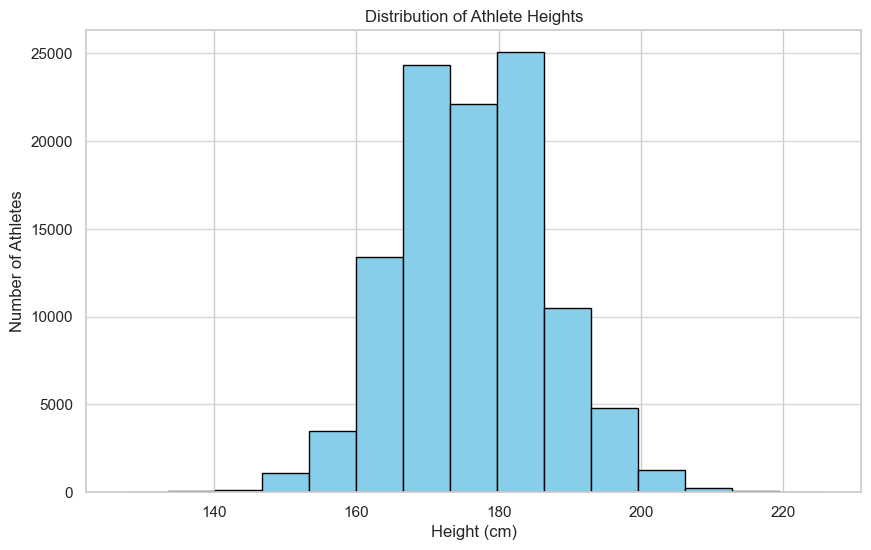

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Ustawienie stylu wykresów
# sns.set(style="whitegrid")

# # Tworzenie wykresu gęstości dla wzrostu
# plt.figure(figsize=(10, 6))
# sns.histplot(bios['height_cm'], bins=30, kde=True)

# # Dodanie tytułu i etykiet
# plt.title('Dystrybucja wzrostu sportowców')
# plt.xlabel('Wzrost (cm)')
# plt.ylabel('Liczba sportowców')

# # Wyświetlenie wykresu
# plt.show()

# Sprawdzenie, czy kolumna 'height_cm' istnieje i usunięcie brakujących wartości
if 'height_cm' in bios.columns:
    heights = bios['height_cm'].dropna()
else:
    raise ValueError("Kolumna 'height_cm' nie istnieje w pliku bios.csv")

# Tworzenie histogramu dla wzrostu sportowców
plt.figure(figsize=(10, 6))
plt.hist(heights, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Athlete Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.grid(axis='y', alpha=0.75)
plt.show()
